 # <a>CAPSTONE PROJECT - HEALTHCARE </a> 

**Name: Ganeshkumar Patel**

## DESCRIPTION
### Problem Statement

The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.
Variables Description

   **[1. Pregnancies :](#:)** Number of times pregnant
    
   **[2. Glucose :](#:)** Glucose Concentration a 2 hour in an oral glucose tolerance test (mg/dl) - A 2-hour value between 140 and 200 mg/dL (7.8 and 11.1 mmol/L) is called impaired glucose tolerance. This is called "pre- diabetes." It means you are at increased risk of developing diabetes over time. A glucose level of 200 mg/dL (11.1 mmol/L) or higher is used to diagnose diabetes.
    
   **[3. BloodPressure :](#:)** Diastolic blood pressure (mm Hg)- If Diastolic B.P > 90 means High B.P (High Probability of Diabetes) Diastolic B.P < 60 means low B.P (Less Probability of Diabetes)
    
   **[4. SkinThickness :](#:)** Triceps skinfold thickness (mm) -A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.
    
   **[5. Insulin :](#:)** 2-Hour Serum Insulin (mu U/ml) - Normal Insulin Level 16-166 mIU/L Values above this range can be alarming.
    
   **[6. BMI :](#:)** Body Mass Index (weight in kg/ height in m2) - Body Mass Index of 18.5 to 25 is within the normal range BMI between 25 and 30 then it falls within the overweight range. A BMI of 30 or over falls within the obese range.
    
   **[7. DiabetesPedigreeFunction :](#:)**It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
    
   **[8. Age :](#:)** Age in years
    
   **[9. Outcome :](#:)** Class variable (either 0 or 1)- where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes The dependent variable is whether the patient is having diabetes or not



# Load libraries and read the data

In [1]:
# import required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import shap
import missingno as msno


In [2]:
df=pd.read_csv('health_care_diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

***The dataset consist of severel medical predictors(independent) variable[Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age] and one target (dependent) variable['Outcome']***

 ## 2. Basic EDA and statistical analysis

In [4]:
# gives information about the data types,columns, null value counts, memory usage etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.duplicated().sum() #checking for any duplicate record

0

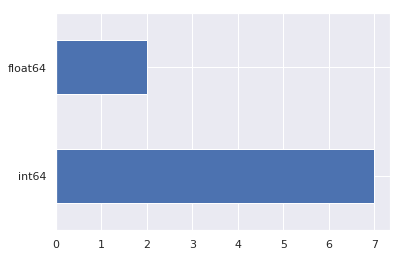

In [6]:
#Frequency Distribution of dtypes
df.dtypes.value_counts().plot(kind='barh')

0    500
1    268
Name: Outcome, dtype: int64


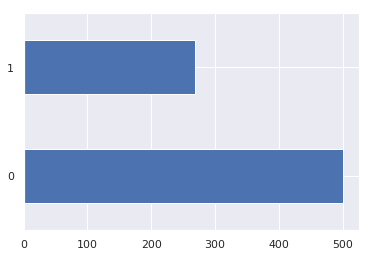

In [7]:
#Balanced dataset or not
print(df.Outcome.value_counts())
df.Outcome.value_counts().plot(kind='barh')

#### From above following observations can conclude:
* There is int64 and float64 dtypes in dataset.
* As all observation are 768 so for now we can say there is no missing values.
* we got an imbalanced dataset

In [8]:
# basic statistic details about the data 
# (note only numerical columns would be displayed here unless parameter include="all")

df.describe().T #transpose the result use '.T'

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Let's investagate each fearure distribution for each out come

A fundamental task in many statistical analyses is to characterize
the location and variability of a data set. A further
characterization of the data includes **skewness and kurtosis**.

**Skewness** is a measure of symmetry, or more precisely, the lack
of symmetry. A distribution, or data set, is symmetric if it
looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed
or light-tailed relative to a normal distribution. That is,
data sets with high kurtosis tend to have heavy tails, or
outliers. Data sets with low kurtosis tend to have light
tails, or lack of outliers. A uniform distribution would
be the extreme case

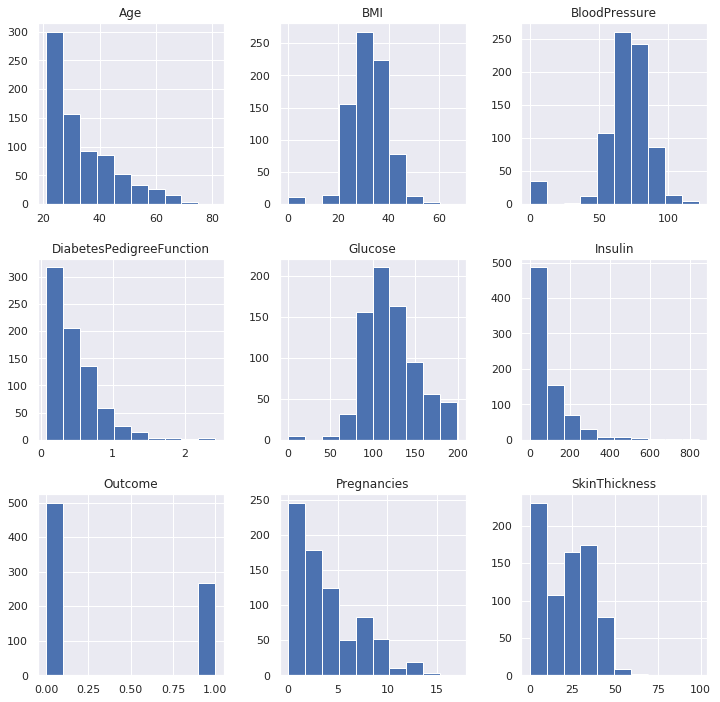

In [9]:
hist=df.hist(figsize=(12,12))

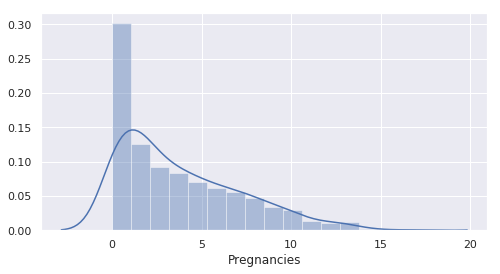

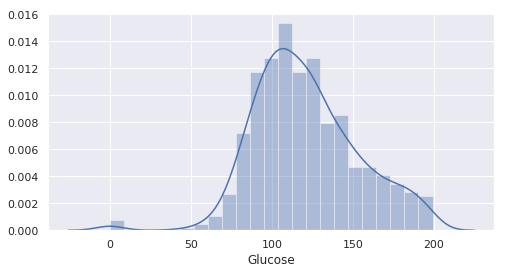

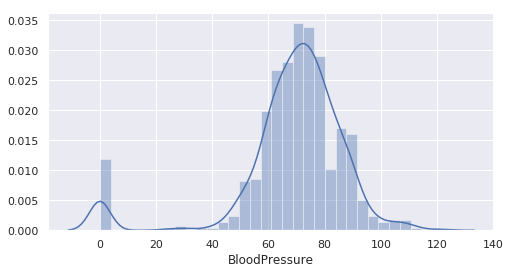

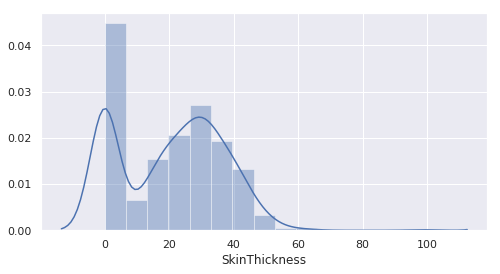

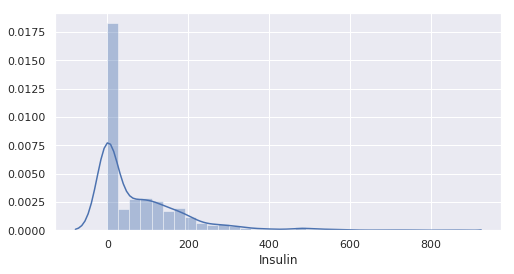

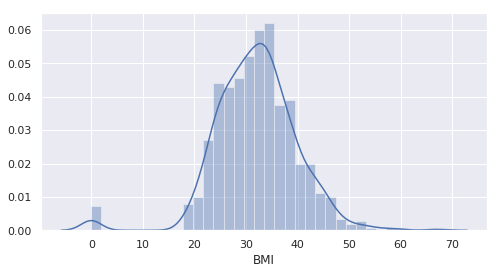

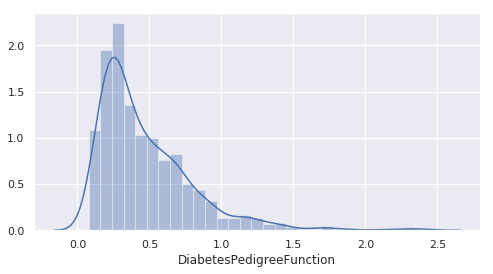

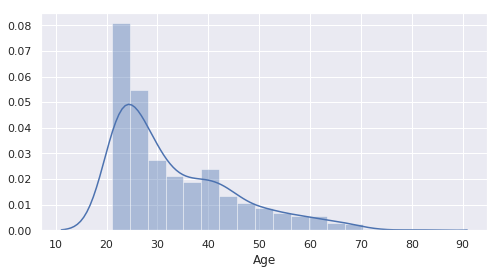

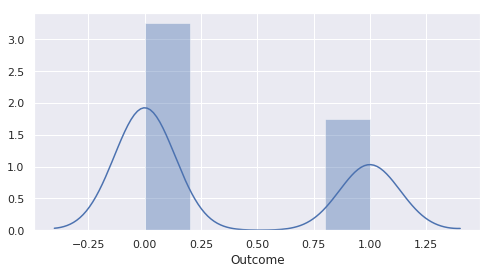

In [10]:
# DATA Distribution Visualization
sns.set()
def plot_dist(df):
    for i in df.columns:
        plt.rcParams['figure.figsize'] = (8, 4)
        plt.figure(i)
        ax=sns.distplot(df[i])
        

plot_dist(df)

In [11]:
#We will define a fuction to give basic stats information
# Basic stats
def basic_stats(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['min value'] = df.min()
    b['max value'] = df.max()
    b['Mean']=df.mean().T
    b['Median']=df.median().T
    b['Mode']=df.mode().T[0]
    b['Skewness'] = df.skew()
    b['dtype'] = df.dtypes
    return b

prime_stats=basic_stats(df)
prime_stats

,Missing value,N unique value,min value,max value,Mean,Median,Mode,Skewness,dtype
Pregnancies,0,17,0.000,17.00,3.845052,3.0000,1.000,0.901674,int64
Glucose,0,136,0.000,199.00,120.894531,117.0000,99.000,0.173754,int64
BloodPressure,0,47,0.000,122.00,69.105469,72.0000,70.000,-1.843608,int64
SkinThickness,0,51,0.000,99.00,20.536458,23.0000,0.000,0.109372,int64
Insulin,0,186,0.000,846.00,79.799479,30.5000,0.000,2.272251,int64
BMI,0,248,0.000,67.10,31.992578,32.0000,32.000,-0.428982,float64
DiabetesPedigreeFunction,0,517,0.078,2.42,0.471876,0.3725,0.254,1.919911,float64
Age,0,52,21.000,81.00,33.240885,29.0000,22.000,1.129597,int64
Outcome,0,2,0.000,1.00,0.348958,0.0000,0.000,0.635017,int64


### Data Report using pandas_profiling package

In [12]:
# we can also generate report with single line code to analyse the data 
import pandas_profiling  #Pandas-Profiling 2.0.0
profilereport=df.profile_report()

In [13]:
profilereport.to_file('Datset_without_cleaning_report.html')

#### From above following observations can conclude:
* After looking mean and median and mode and histogram we came to know that most of features are skewed just because of the zero values concentration on one side, and having some outliers
* On following columns, a value of zero does not make sense and thus indicates missing value.
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

It is better to replace zeros with NaN as to replace NaN with suitable values would be easier.

# Missing value treatment

In [14]:
df_copy = df.copy(deep = True)
#replace zero values as nan in relevent columns
for i in df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]:
    df_copy[i].replace(0, np.nan, inplace= True)
stats_with_NAN=basic_stats(df_copy)
stats_with_NAN

,Missing value,N unique value,min value,max value,Mean,Median,Mode,Skewness,dtype
Pregnancies,0,17,0.000,17.00,3.845052,3.0000,1.000,0.901674,int64
Glucose,5,135,44.000,199.00,121.686763,117.0000,99.000,0.530989,float64
BloodPressure,35,46,24.000,122.00,72.405184,72.0000,70.000,0.134153,float64
SkinThickness,227,50,7.000,99.00,29.153420,29.0000,32.000,0.690619,float64
Insulin,374,185,14.000,846.00,155.548223,125.0000,105.000,2.166464,float64
BMI,11,247,18.200,67.10,32.457464,32.3000,32.000,0.593970,float64
DiabetesPedigreeFunction,0,517,0.078,2.42,0.471876,0.3725,0.254,1.919911,float64
Age,0,52,21.000,81.00,33.240885,29.0000,22.000,1.129597,int64
Outcome,0,2,0.000,1.00,0.348958,0.0000,0.000,0.635017,int64


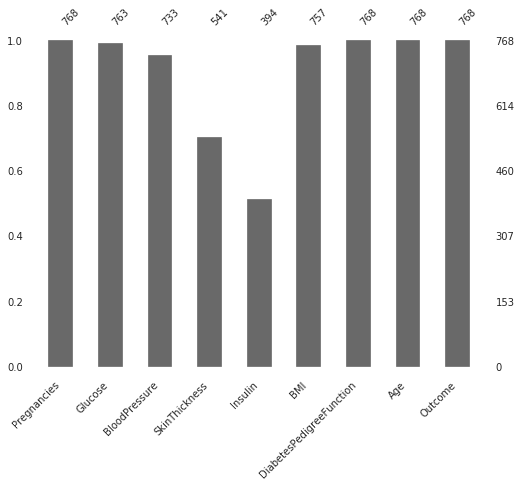

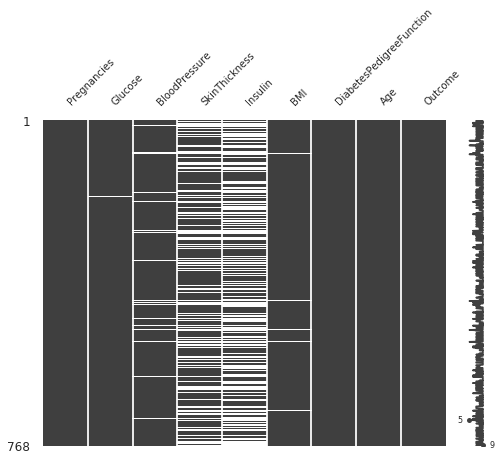

In [15]:
# we will plot missing matrix map with missingno package
msno.bar(df_copy, figsize=(8,6),fontsize=10)
msno.matrix(df_copy, figsize=(8,6),fontsize=10)

NaN values will replace using fancyimpute package and with KNN impute approach which takes average of k values which are based on nearest eucledian distance, but for that we will first sort our data based on Age and make it in two dataframes based on Outcome so with nan value calculated will be nearby value not much different so data will not give false signals to algorithms we use later. 

(Note: If it doesnt gives better results score then those values we will replace with mean of groupby with age group of (10 -25) younger,(25-40) young, (40-60) mature,(60-100) old  based on data distribution. )

In [16]:
#sort our data based on Age 
df_copy.sort_values(by='Age',inplace=True)
df_copy.reset_index(drop=True,inplace=True)
print(df_copy.shape)
df_copy.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,113.0,64.0,35.0,NaN,33.6,0.543,21,1
1,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
2,0,125.0,96.0,NaN,NaN,22.5,0.262,21,0
3,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
4,0,94.0,70.0,27.0,115.0,43.5,0.347,21,0


In [17]:
#split data in two dataframes based on Outcome to impute NaN values
df1=df_copy[(df_copy.Outcome==0)]
df2=df_copy[(df_copy.Outcome==1)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               268 non-null    int64  
 1   Glucose                   266 non-null    float64
 2   BloodPressure             252 non-null    float64
 3   SkinThickness             180 non-null    float64
 4   Insulin                   130 non-null    float64
 5   BMI                       266 non-null    float64
 6   DiabetesPedigreeFunction  268 non-null    float64
 7   Age                       268 non-null    int64  
 8   Outcome                   268 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 20.9 KB


In [18]:
from fancyimpute import IterativeImputer,KNN

Using TensorFlow backend.


In [19]:
KNN_imputer = KNN(k=7)
#MICE_imputer = IterativeImputer(random_state=10)
df1.iloc[:, :] = KNN_imputer.fit_transform(df1)
df2.iloc[:, :] = KNN_imputer.fit_transform(df2)

Imputing row 1/500 with 4 missing, elapsed time: 0.061
Imputing row 101/500 with 0 missing, elapsed time: 0.064
Imputing row 201/500 with 0 missing, elapsed time: 0.066
Imputing row 301/500 with 2 missing, elapsed time: 0.069
Imputing row 401/500 with 0 missing, elapsed time: 0.073
Imputing row 1/268 with 1 missing, elapsed time: 0.021
Imputing row 101/268 with 0 missing, elapsed time: 0.025
Imputing row 201/268 with 2 missing, elapsed time: 0.028


In [20]:
df_copy1=pd.concat((df1,df2),axis=0)
df_copy1.sort_values(by='Age',inplace=True)
df_copy1.reset_index(drop=True,inplace=True)
df_copy1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,58.655647,23.413174,63.830150,30.276492,0.304,21.0,0.0
1,0.0,102.0,52.000000,17.144229,107.217628,25.100000,0.078,21.0,0.0
2,1.0,114.0,66.000000,36.000000,200.000000,38.100000,0.289,21.0,0.0
3,2.0,108.0,62.000000,32.000000,56.000000,25.200000,0.128,21.0,0.0
4,0.0,134.0,58.000000,20.000000,291.000000,26.400000,0.352,21.0,0.0


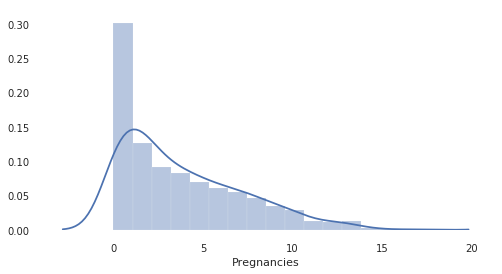

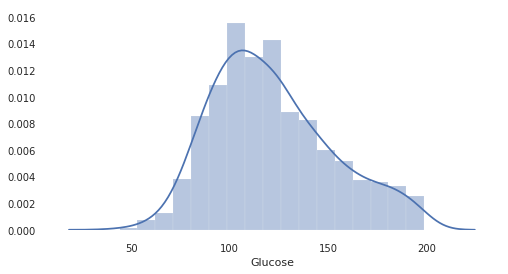

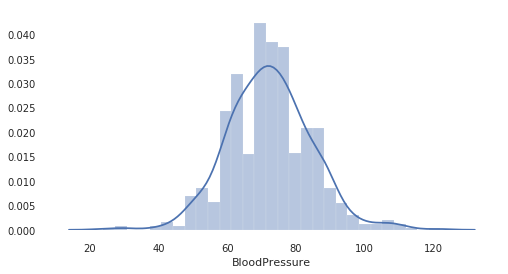

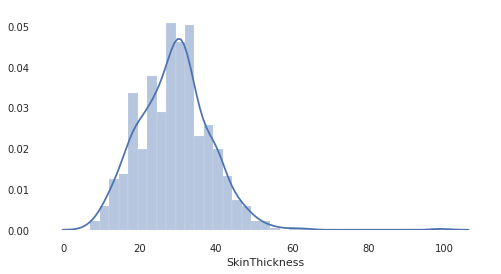

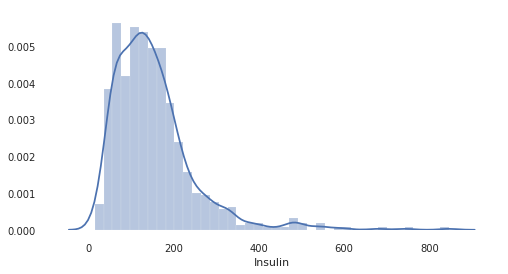

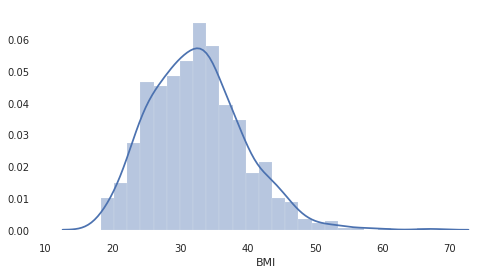

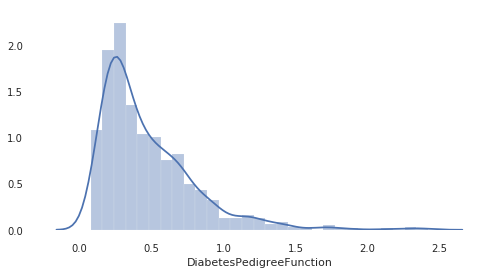

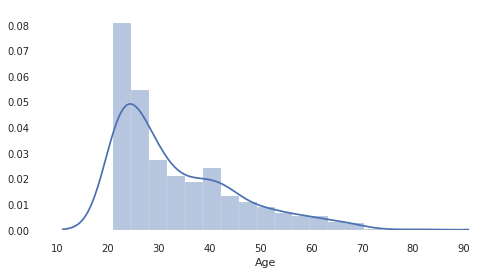

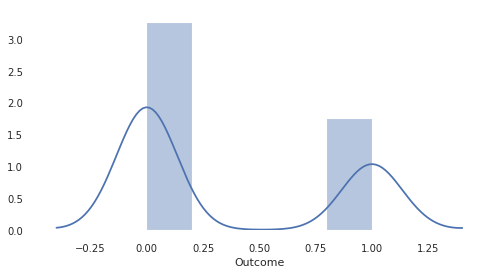

In [21]:
# DATA Distribution Visualization function recalled
plot_dist(df_copy1)

***It seems there are still some outlier present which are leading towards skewed distribution***

In [22]:
#Basic Stats function recalled
stats_without_NAN = basic_stats(df_copy1)
stats_without_NAN

,Missing value,N unique value,min value,max value,Mean,Median,Mode,Skewness,dtype
Pregnancies,0,17,0.000,17.00,3.845052,3.000000,1.000,0.901674,float64
Glucose,0,140,44.000,199.00,121.601193,117.000000,99.000,0.530214,float64
BloodPressure,0,81,24.000,122.00,72.294470,72.000000,70.000,0.154208,float64
SkinThickness,0,277,7.000,99.00,29.058638,29.074144,32.000,0.688195,float64
Insulin,0,559,14.000,846.00,151.263300,134.785940,105.000,2.242903,float64
BMI,0,258,18.200,67.10,32.427547,32.050000,32.000,0.606808,float64
DiabetesPedigreeFunction,0,517,0.078,2.42,0.471876,0.372500,0.254,1.919911,float64
Age,0,52,21.000,81.00,33.240885,29.000000,22.000,1.129597,float64
Outcome,0,2,0.000,1.00,0.348958,0.000000,0.000,0.635017,float64


* From above we can say zero values get replaced by KNN imputer with relevent average value computed based on eucledian distance.
* Insulin, sinthickness and diabetespedigreefunction column are having skewed distribution because of outliers so we try to detect and treat them

# Outlier Treatment

In [23]:
df_copy2=df_copy1.copy(deep=True)

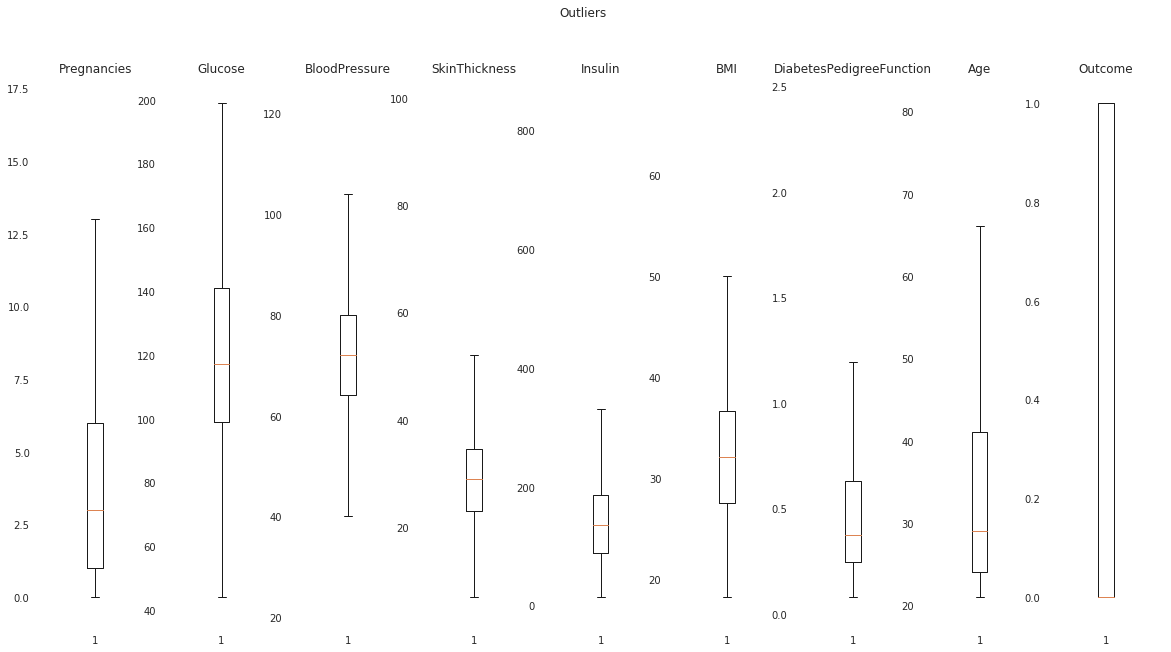

In [24]:
# Outliers Visualization
def plot_outliers(df):
    df_name = df.columns
    fig, axs = plt.subplots(1, len(df_name), figsize=(20, 10))

    for i, col in enumerate(df_name):
        axs[i].set_title(col)
        axs[i].boxplot(df[col])
    fig.suptitle('Outliers');

plot_outliers(df_copy2)

In [25]:
#define a function which can detects and drops the outliers if required

def outliers(df, drop=False):
    for Feature in df.columns:
        value = df[Feature]
        # 25th percentile of the data
        Q1 = np.percentile(value, 25.)
        # 75th percentile of the data
        Q3 = np.percentile(value, 75.)
        # Use the interquartile range to calculate an outlier (1.5 times the interquartile range)
        step = (Q3-Q1)*1.5

        outliers = value[~((value >= Q1 - step) & (value <= Q3 + step))].index.tolist()
        feature_outliers = value[~((value >= Q1 - step) & (value <= Q3 + step))].values

        if drop:
            df = df.drop(df.index[outliers]).reset_index(drop = True)
            print("New dataset with removed outliers has shape ({}, {})".format(*df.shape))
    
    return df

## What to do with these outliers:

From above boxplot and function output we came to know that there are some outliers which are very extreme values.
1. Outliers are having some useful information or they are just because of typo error. we will verify it by removing extreme values at first....If accuracy not achieved then we will drop all outliers.
2. Insulin and DiabetesPedigreefunction having many outlier function. so we will remove only extreme values just to avoid data loss.

Note: 
1. Outliers leads to make wrong decisions by making wrong if else loop in decesion trees whenever outlier is a typo and also its not easy for liniear methods to handle outliers. 
2. But when it is  genuine and containing useful information at that time droping it will loss of information.  In short model will not be able to be generalised.

In [90]:
# Insulin value above 420 are extreme and making tail longer so we will drop them
df_copy2=df_copy2[(df_copy2.Insulin<=420)]

# skinthickness above 80 has only one datapoint so we will drop it
df_copy2=df_copy2[(df_copy2.SkinThickness<=80)]

# Blood Pressure below 20 doesn't make sense so we will drop it
df_copy2=df_copy2[(df_copy2.BloodPressure>=20)]

# BMI above 60 has only one datapoint so we will drop it
df_copy2=df_copy2[(df_copy2.BMI<=60)]

# DiabetesPedigreeFunction value above 2 are extreme and making tail longer so we will drop them
df_copy2=df_copy2[(df_copy2.DiabetesPedigreeFunction<=2)]

# Age value above 80 are extreme and making tail longer so we will drop them
df_copy2=df_copy2[(df_copy2.Age<=80)]

# Pregnancies value above 15 are extreme and making tail longer so we will drop them
df_copy2=df_copy2[(df_copy2.Pregnancies<=15)]

In [27]:
# after removal of ouliers our data shape reduced 
df_clean=df_copy2
df_clean.shape

(744, 9)

In [28]:
#calling defined basic stats function
stats_without_outlier = basic_stats(df_clean)
stats_without_outlier

,Missing value,N unique value,min value,max value,Mean,Median,Mode,Skewness,dtype
Pregnancies,0,16,0.000,15.000,3.856183,3.000000,1.000,0.862739,float64
Glucose,0,138,44.000,199.000,120.248275,116.000000,99.000,0.564777,float64
BloodPressure,0,80,24.000,122.000,72.252894,72.000000,70.000,0.152837,float64
SkinThickness,0,275,7.000,60.000,28.707035,29.000000,32.000,0.145588,float64
Insulin,0,541,15.000,415.000,141.778577,132.221071,105.000,0.895677,float64
BMI,0,253,18.200,57.300,32.214995,32.000000,32.000,0.441119,float64
DiabetesPedigreeFunction,0,502,0.078,1.893,0.461868,0.367000,0.254,1.457394,float64
Age,0,51,21.000,72.000,33.108871,29.000000,22.000,1.103981,float64
Outcome,0,2,0.000,1.000,0.337366,0.000000,0.000,0.689338,float64


In [29]:
#compare mean median mode with NAN, without NAN, without Outlier
Basic_stats_before_and_after_cleaning= pd.concat((prime_stats.iloc[:,[0,4,5]],stats_with_NAN.iloc[:,[0,4,5]],\
                                                stats_without_NAN.iloc[:,[0,4,5]],stats_without_outlier.iloc[:,[0,4,5,6]]),axis=1)
Basic_stats_before_and_after_cleaning

,Missing value,Mean,Median,Missing value,Mean,Median,Missing value,Mean,Median,Missing value,Mean,Median,Mode
Pregnancies,0,3.845052,3.0000,0,3.845052,3.0000,0,3.845052,3.000000,0,3.856183,3.000000,1.000
Glucose,0,120.894531,117.0000,5,121.686763,117.0000,0,121.601193,117.000000,0,120.248275,116.000000,99.000
BloodPressure,0,69.105469,72.0000,35,72.405184,72.0000,0,72.294470,72.000000,0,72.252894,72.000000,70.000
SkinThickness,0,20.536458,23.0000,227,29.153420,29.0000,0,29.058638,29.074144,0,28.707035,29.000000,32.000
Insulin,0,79.799479,30.5000,374,155.548223,125.0000,0,151.263300,134.785940,0,141.778577,132.221071,105.000
BMI,0,31.992578,32.0000,11,32.457464,32.3000,0,32.427547,32.050000,0,32.214995,32.000000,32.000
DiabetesPedigreeFunction,0,0.471876,0.3725,0,0.471876,0.3725,0,0.471876,0.372500,0,0.461868,0.367000,0.254
Age,0,33.240885,29.0000,0,33.240885,29.0000,0,33.240885,29.000000,0,33.108871,29.000000,22.000
Outcome,0,0.348958,0.0000,0,0.348958,0.0000,0,0.348958,0.000000,0,0.337366,0.000000,0.000


## Observations
* With imputation our Stats data values are almost same as they were before(with NAN and with imputation and after removal of outlier
* Note: With zero values stats data values are different just because zero value obs increases counts (n)  in formula for Insulin, SkinThickness column
* so we can say imputation of missing values will not impact in wrong way on our classification

Our features skewness is as following:
+ Pregnancies: Right skewed
+ Glucose: Right Skewed
+ BloodPressure: Right Skewed
+ SkinThickness: Left Skewed
+ Insulin: Right Skewed
+ BMI: Consider as No skewed (as having very small skewness)
+ DiabetesPedigreeFunction: Right Skewed
+ Age: Right Skewed



# Feature engineering

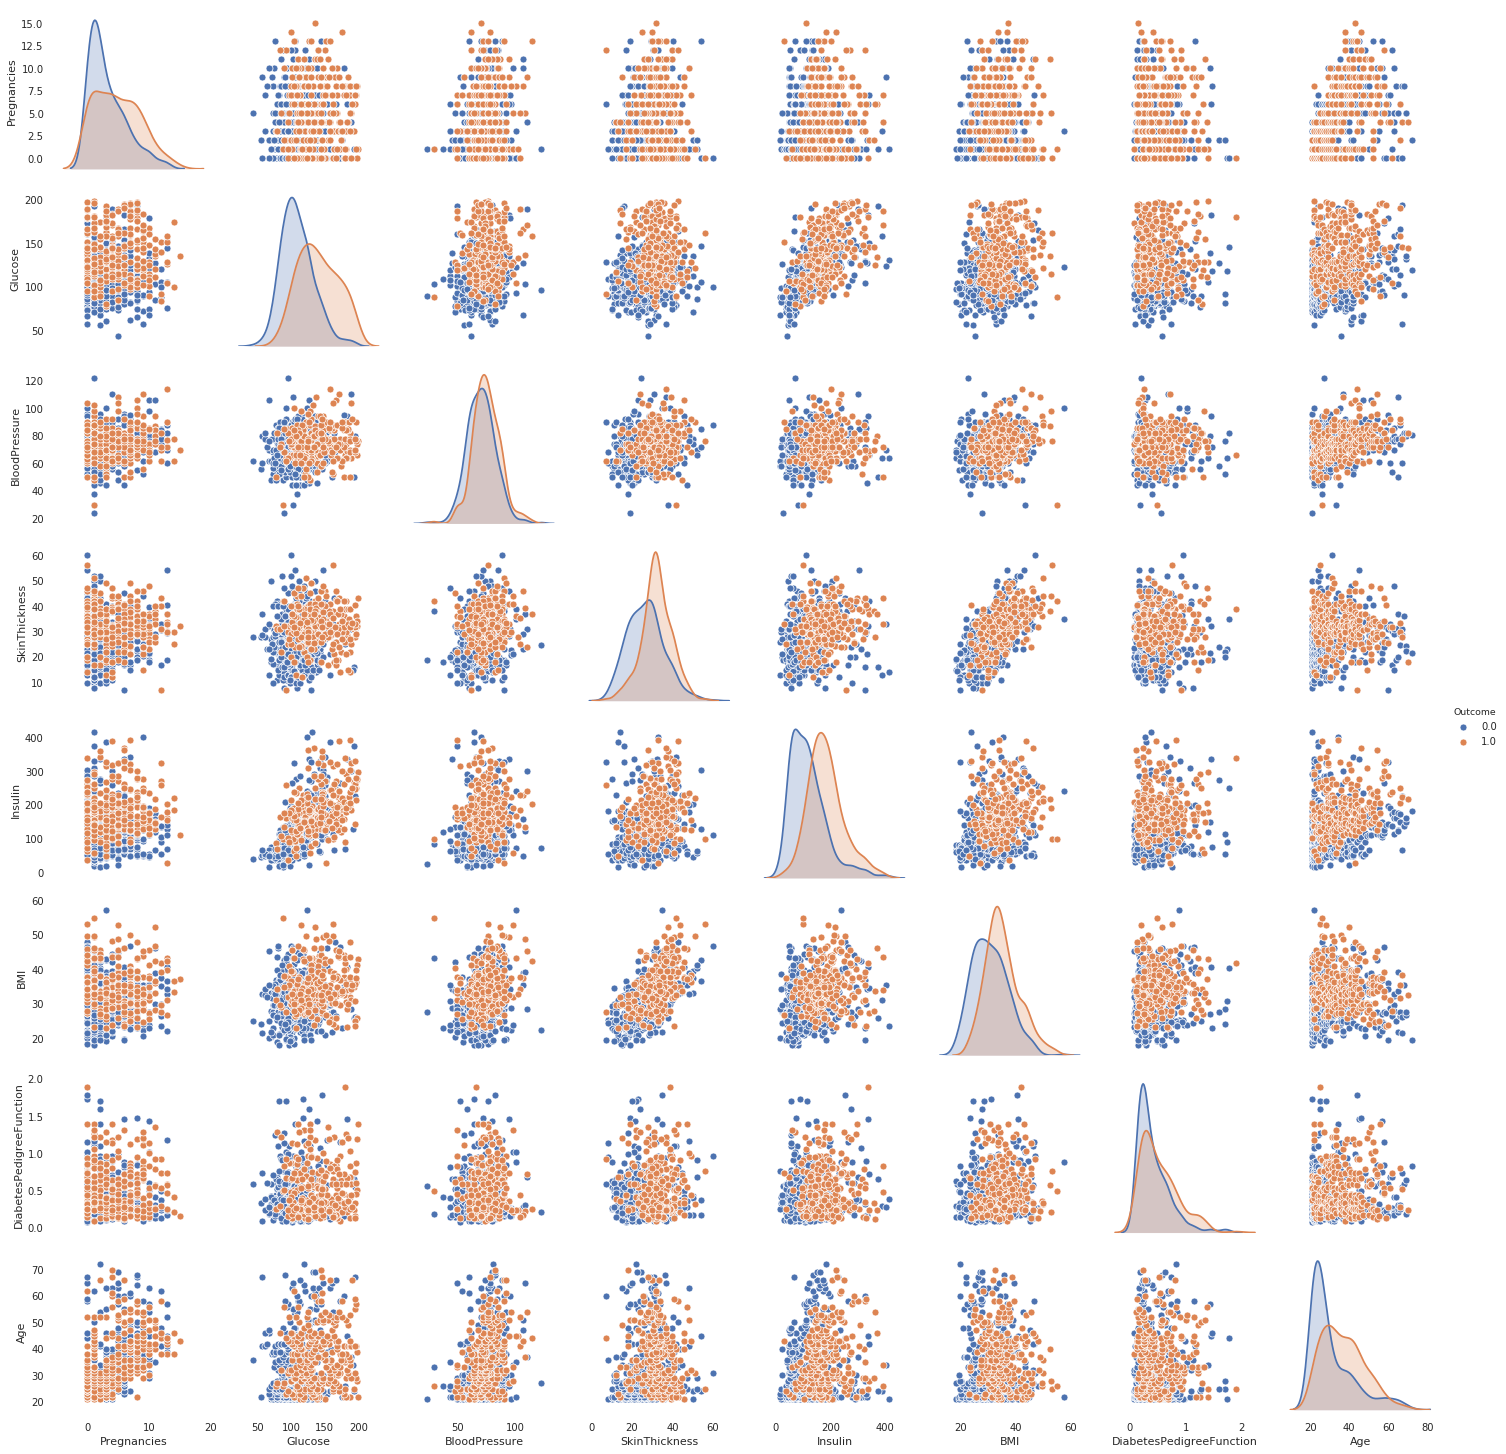

In [30]:
# pairplot 
sns.pairplot(df_clean, hue='Outcome')#,palette="husl")

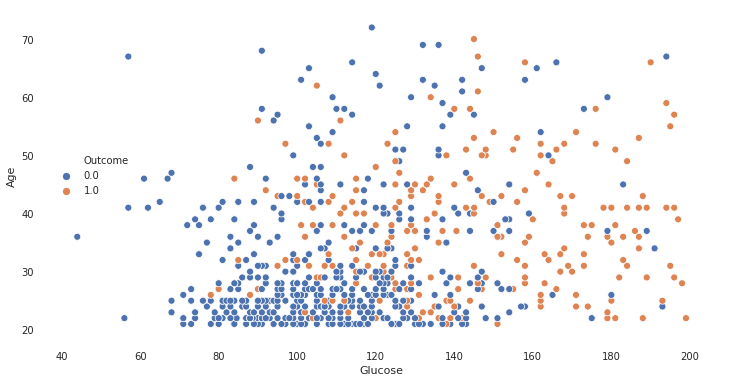

In [31]:
#close look on some scatter plots which seems to be corelated

fig = plt.figure(figsize=(12,6))

ax1 = sns.scatterplot(x = df_clean['Glucose'], y = df_clean['Age'], hue = "Outcome",
                    data = df_clean)

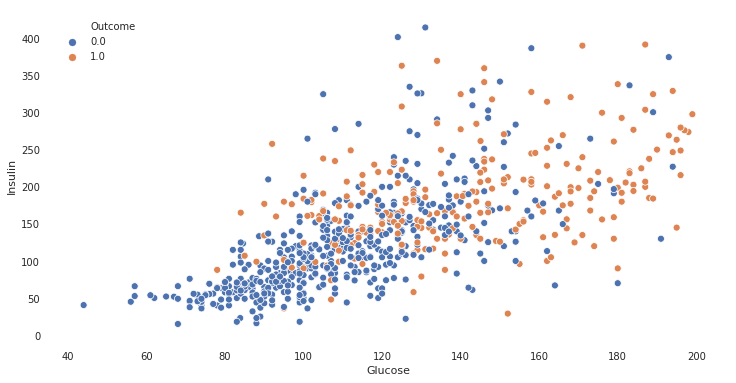

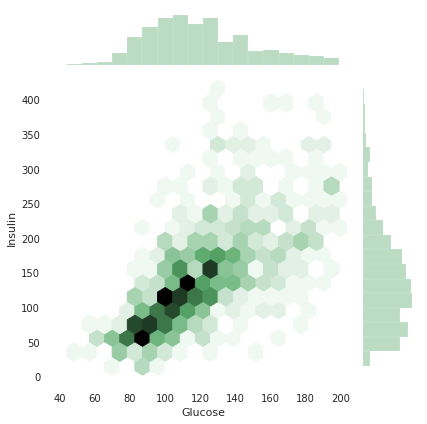

In [32]:
fig = plt.figure(figsize=(12,6))
ax2= sns.scatterplot(x = df_clean['Glucose'], y = df_clean['Insulin'], hue = "Outcome",
                    data = df_clean)
sns.jointplot('Glucose','Insulin',data = df_clean,kind='hex',color = "g")

## Observations:
 1. From above pairplot diagonal KDE plot we can conclude that our clean data looks normally distributed. Except Pregnancies and Age and DiabetesPedigreeFunction these features slightly right skewed
 2. Scatterplots showing data points are not easily linearly separable as they are overlapped, thus linear classification algorithms will not be able to give higher accuracy.
 3. Pairplot shows 'BloodPressure' and 'DiabetesPedigreeFunction' has similar KDE distribution for both Outcomes so it might not suitable for separation
 4. Glucose has close relation with insulin and Age and most of healthy peopels found within a range  of Glucose 40 to 120 and data is more concentrated there, Over this Glucose range we can predict most probably the person is Diabetic

****we will create new features depending on what we come to know from our EDA****

In [33]:
df_clean['AG_Prob_D']=np.where(((df_clean.Glucose<=150) & (df_clean.Age<30)),0,1)

In [34]:
df_clean['IG_Prob_D']=np.where(((df_clean.Insulin<=150)&(df_clean.Glucose<=130)),0,1)

In [35]:
df_clean['Preg_DPF']=df_clean.DiabetesPedigreeFunction*df_clean.Pregnancies

In [37]:
df_clean['Outcome']=df_clean['Outcome'].astype('int64')
df_clean1=df_clean.copy(deep=True)

In [38]:
df_clean1[(df_clean1['IG_Prob_D']==df_clean1[ 'Outcome'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AG_Prob_D,IG_Prob_D,Preg_DPF
0,2.0,84.0,58.655647,23.413174,63.830150,30.276492,0.304,21.0,0,0,0,0.608
1,0.0,102.0,52.000000,17.144229,107.217628,25.100000,0.078,21.0,0,0,0,0.000
3,2.0,108.0,62.000000,32.000000,56.000000,25.200000,0.128,21.0,0,0,0,0.256
5,1.0,71.0,78.000000,50.000000,45.000000,33.200000,0.422,21.0,0,0,0,0.422
6,3.0,87.0,60.000000,18.000000,62.838083,21.800000,0.444,21.0,0,0,0,1.332
...,...,...,...,...,...,...,...,...,...,...,...,...
757,6.0,190.0,92.000000,33.489577,250.245083,35.500000,0.278,66.0,1,1,1,1.668
759,4.0,146.0,78.000000,28.023239,223.176295,38.500000,0.520,67.0,1,1,1,2.080
761,0.0,57.0,60.000000,28.761378,65.950022,21.700000,0.735,67.0,0,1,0,0.000
762,8.0,91.0,82.000000,36.167834,137.027321,35.600000,0.587,68.0,0,1,0,4.696


In [39]:
#prediction acc based on only one feature 'IG_Prob_D' created depending on EDA
total_matching_rows=541
prdiction_acc=total_matching_rows/df_clean.shape[0]*100
prdiction_acc

72.71505376344086

***Base model accuracy***

In [40]:
'''If model predicts only zeros i.e. non diebetic which is highest outcome
in our dataset then also we will get accuracy:'''
(df.Outcome.value_counts()/df.shape[0]*100)[0]

65.10416666666666

**Above dataframe indicates that [72.71%]() outcome can be predicted without modelling just on the basis of our EDA. with single feature we have created Which is higher than the base model accuracy. [Thus model should have more accuracy than 73% below which will be considerd as a Bad model]()**

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AG_Prob_D,IG_Prob_D,Preg_DPF
Pregnancies,1.000000,0.151432,0.228246,0.131705,0.116636,0.053343,-0.023896,0.546860,0.233153,0.543427,0.140450,0.705919
Glucose,0.151432,1.000000,0.241308,0.202041,0.662708,0.217905,0.103261,0.273760,0.489905,0.407599,0.702863,0.164077
BloodPressure,0.228246,0.241308,1.000000,0.232470,0.174453,0.286128,0.026828,0.364997,0.175451,0.327569,0.221839,0.174528
SkinThickness,0.131705,0.202041,0.232470,1.000000,0.260872,0.656098,0.063365,0.150394,0.287826,0.214560,0.218912,0.083367
Insulin,0.116636,0.662708,0.174453,0.260872,1.000000,0.288898,0.134718,0.243342,0.415056,0.301912,0.736433,0.155080
BMI,0.053343,0.217905,0.286128,0.656098,0.288898,1.000000,0.118359,0.057391,0.314962,0.159178,0.254407,0.075840
DiabetesPedigreeFunction,-0.023896,0.103261,0.026828,0.063365,0.134718,0.118359,1.000000,0.050139,0.167541,0.097447,0.130874,0.499870
Age,0.546860,0.273760,0.364997,0.150394,0.243342,0.057391,0.050139,1.000000,0.238729,0.725889,0.283242,0.404652
Outcome,0.233153,0.489905,0.175451,0.287826,0.415056,0.314962,0.167541,0.238729,1.000000,0.372514,0.467812,0.273526
AG_Prob_D,0.543427,0.407599,0.327569,0.214560,0.301912,0.159178,0.097447,0.725889,0.372514,1.000000,0.317371,0.416657


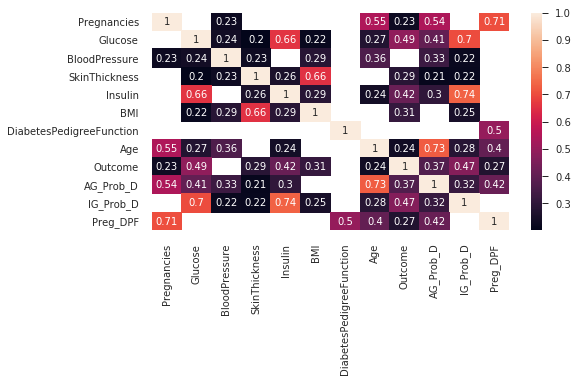

In [41]:
#correlation of features
corr=df_clean1.corr()
sns.heatmap(corr[(corr >= 0.2) & (corr >= -0.2)],annot=True)
corr

## Observations:

1. DiabetesPedigreeFunction and Blood pressure has no linear corelation with outcome more than 0.2. So these variables will not be helpful with linear classification models
2. No feature is highly corelated with outcome. Insulin, Glucose and newly created features are having slightly higher corelation with outcome.


***Now lets find importance of our features:***

**Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select the best features based on their importance from the Dataset.



In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features, label = df_clean1.iloc[:,df_clean1.columns!='Outcome'],df_clean1.iloc[:,df_clean1.columns=='Outcome']

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(features,label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [43]:
featureScores.sort_values(by='Score',ascending=False)

,Specs,Score
4,Insulin,4851.085473
1,Glucose,1318.567964
7,Age,171.101639
3,SkinThickness,168.959567
10,Preg_DPF,153.000895
0,Pregnancies,117.140424
5,BMI,102.258176
9,IG_Prob_D,84.475368
8,AG_Prob_D,48.707031
2,BloodPressure,46.636333


* Quick note: From above it is clear Insulin and Glucose plays crucial role in our classification and it make sense too, in general high Insulin level and high glucose level are alarming situations for diabetes. 
* After looking feature importance and correlation coefficent we will remove DiabetesPedigreeFunction.
+ from pairplot its clear that pregnancies variable doesnot shows any separable value for our dat. so we will try modeling with and without pregnancies variable whichever is best we will keep it.

# Modelling

## Train,  Test  Split and Cross Validation methods



***[Train Test Split]()*** (Hold Out Method) : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.


***[Cross Validation]()***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques



***[About Stratify]()*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.


In [46]:
# Always good to set a seed for reproducibility
SEED = 10
np.random.seed(SEED)

In [47]:
#converting and splitting  features and label into numpy array train and test data
from sklearn.model_selection import train_test_split
features, label = df_clean1.iloc[:,[1,2,3,4,5,7,9,10,11]],df_clean1.iloc[:,[8]]

#train, test split(we will validate our model on 20%test data and will build model with CV)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=SEED,stratify=label)


***Imbalanced Dataset*** 
 + Inorder to make our dataset Balanced we will use imblearn package. With the help of oversampling we will get a balanced dataset for modeling 
   so that our model will not tends towards predicting more zero class rather than one class for which we are intrested.
 + Note: we are considering that we are focused to classify correctly the Diabetic(outcome=1) person. (If both outcomes have same weightage then there is no need of oversampling. The decesion depends on client requirement.)
   

In [48]:
print("Before OverSampling, counts: Features {} and Label {}".format(X_train.shape,y_train.shape)) 
print("{}".format(y_train.Outcome.value_counts())) 
#import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 64) 
X_train_os, y_train_os = sm.fit_sample(X_train, y_train) 
  
print("After OverSampling, counts: Features {} and Label {}".format(X_train_os.shape,y_train_os.shape)) 
print("{}".format(y_train_os.Outcome.value_counts())) 

Before OverSampling, counts: Features (595, 9) and Label (595, 1)
0    394
1    201
Name: Outcome, dtype: int64
After OverSampling, counts: Features (788, 9) and Label (788, 1)
1    394
0    394
Name: Outcome, dtype: int64


In [49]:
X_test.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,AG_Prob_D,IG_Prob_D,Preg_DPF
299,165.0,76.0,43.000000,255.000000,47.9,26.0,1,1,0.0
524,179.0,70.0,26.829174,191.330157,35.1,37.0,1,1,2.0


In [50]:
X_train, y_train,=X_train_os, y_train_os 

### Build the Machine Learning Model

To build an efficient model, we need to compare the performance of various machine learning classification algorithms. We will use the algorithms from groups listed below:

Machine Learning Classificaton Algorithms:

  + Generalized Linear Models (GLM)
  + Support Vector Machines (SVM)
  + Nearest Neighbors
  + Naive Bayes
  + Decision Trees
  + Ensemble Methods


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,ShuffleSplit,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report,roc_auc_score,auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

cv_split = ShuffleSplit(n_splits = 10, test_size = 0.1, train_size = 0.9, random_state = 0)
pipeline = Pipeline([
    ('scale', StandardScaler()),#Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=5))
clfs.append(GaussianNB()) 
clfs.append(DecisionTreeClassifier(max_depth=6))
clfs.append(RandomForestClassifier(max_depth=6))
clfs.append(ExtraTreesClassifier(max_depth=6))               
clfs.append(AdaBoostClassifier(n_estimators=100))                 
clfs.append(GradientBoostingClassifier(n_estimators=100))

results=[]
results1=[]
results2=[]
results3=[]
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, cv=cv_split, return_train_score=True)
    #default parameter fit for comparision with CV Score and Default fit score
    pipeline.set_params(clf = classifier)
    pipeline.fit(X_train,y_train)
    train_acc=pipeline.score(X_train, y_train)
    test_acc=pipeline.score(X_test, y_test)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            if key=='test_score':
                results.append({'Test_mean_Score': values.mean(), 'Test_Std': values.std()})
    for key, values in scores.items():
            if key=='train_score':
                results1.append({'Train_mean_Score': values.mean(), 'Train_Std': values.std()})
    for key, values in scores.items():
            if key=='fit_time':
                results2.append({'Fit_time': values.mean()})

    results3.append({'Def_Train_score':train_acc,'Def_Test_score':test_acc})

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------
---------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
-----------------------------------
---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
-----------------------------------
---------------------------

In [52]:
results=pd.DataFrame(results,index=['LR','SVC', 'KNN','NB','DT','RF','ET', 'AB','GB'])
results1=pd.DataFrame(results1,index=['LR','SVC','KNN','NB','DT','RF','ET', 'AB','GB'])
results2=pd.DataFrame(results2,index=['LR','SVC','KNN','NB','DT','RF','ET', 'AB','GB'])
results3=pd.DataFrame(results3,index=['LR','SVC','KNN','NB','DT','RF','ET', 'AB','GB'])

In [53]:
Compare_models=pd.concat((results1,results,results3,results2),axis=1)
Compare_models.sort_values(by='Test_mean_Score',ascending=False)

,Train_mean_Score,Train_Std,Test_mean_Score,Test_Std,Def_Train_score,Def_Test_score,Fit_time
KNN,0.869817,0.003219,0.827848,0.034527,0.871827,0.785235,0.005799
SVC,0.862906,0.004361,0.825316,0.038311,0.866751,0.838926,0.026157
RF,0.920451,0.003847,0.812658,0.036600,0.914975,0.791946,0.248341
GB,0.942595,0.004888,0.802532,0.042814,0.937817,0.771812,0.261099
ET,0.849506,0.006434,0.793671,0.043868,0.841371,0.798658,0.181398
DT,0.875882,0.006402,0.775949,0.032544,0.869289,0.718121,0.008944
LR,0.774471,0.005658,0.762025,0.046613,0.774112,0.778523,0.010632
NB,0.774471,0.004697,0.758228,0.038164,0.774112,0.751678,0.005388
AB,0.869958,0.007746,0.755696,0.027178,0.855330,0.738255,0.250197


## What we came to know from above...?

From the above results, it can be seen that ***[SVC and KNN has the highest test accuracy]()*** and tree based classifiers(GB and RF) are nearly overfitted since training accuracy is around 92%, while its test accuracy is only around 80% in CV. So, these algorithm cannot be trusted as it is for our model in terms of its generalization ability. Right now its clear for our dataset SVC and KNN are best performing models.
So, we will tune some of the better performing algorithms by searching for the best parameters for them. in order to get very generalised model.

**[Notable thing is that fitting time of SVC is higher compare to KNN but it has closer testing and training accuracy..showing no overfitting]()**
  
For now we will be choosing first 4 classifiers for hyper parameter tuning with the order based on prefrence with model build time and test accuracy:
1. SVC
2. KNN
3. GB
4. RF

***Model - SVC***

In [54]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
pipeline.set_params(clf= SVC(probability=True))
pipeline.steps


[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False))]

In [55]:
param_grid = {
    'clf__kernel' : ['linear', 'rbf','poly','sigmoid'],
    'clf__C' : np.linspace(0.1,4.2),
    'clf__gamma' : ['scale', 'auto'],
    'clf__random_state': np.arange(1,150)
}

In [56]:
svc_grid = RandomizedSearchCV(pipeline, param_grid, cv=cv_split, n_iter = 10)
svc_grid.fit(X_train, y_train)
svc_grid.best_params_

{'clf__random_state': 118,
 'clf__kernel': 'rbf',
 'clf__gamma': 'scale',
 'clf__C': 3.7816326530612248}

In [57]:
svc_grid=svc_grid.best_estimator_

0.8405063291139241 0.01894510069252629


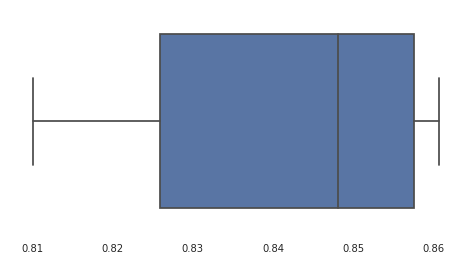

In [58]:
a=cross_val_score(svc_grid, X_train, y_train, cv=cv_split, scoring="accuracy")
print(a.mean(),a.std())
sns.boxplot(a)

In [59]:
y_predict1 = svc_grid.predict(X_test)
y_prob1=svc_grid.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_predict1)
accuracy

0.8456375838926175

In [60]:
print('auc=', roc_auc_score(y_test,y_prob1[:,1]))
print(classification_report(y_test,y_predict1))

confusion_matrix(y_test,y_predict1)

auc= 0.88989898989899
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        99
           1       0.73      0.86      0.79        50

    accuracy                           0.85       149
   macro avg       0.83      0.85      0.83       149
weighted avg       0.86      0.85      0.85       149



array([[83, 16],
       [ 7, 43]])

***Model - KNN***

In [61]:
pipeline.set_params(clf= KNeighborsClassifier())
pipeline.steps


[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform'))]

In [62]:
param_grid = {
    'clf__metric' : ['minkowski', 'eucledian','Manhattan'],
    'clf__n_neighbors' : np.arange(3,10,1),
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [63]:
knn_grid = RandomizedSearchCV(pipeline, param_grid, cv=cv_split, n_iter = 10)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'clf__n_neighbors': 3,
 'clf__metric': 'minkowski',
 'clf__algorithm': 'ball_tree'}

In [64]:
knn_grid=knn_grid.best_estimator_

0.8341772151898734 0.029659175984455638


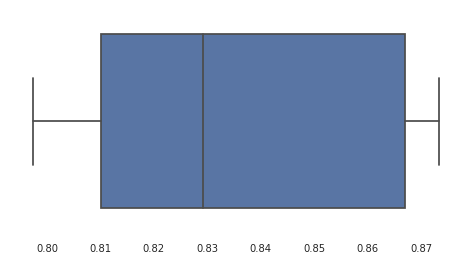

In [65]:
a=cross_val_score(knn_grid, X_train, y_train, cv=cv_split, scoring="accuracy")
sns.boxplot(a)
print(a.mean(),a.std())

In [66]:
y_predict2 = knn_grid.predict(X_test)
y_prob2=knn_grid.predict_proba(X_test)

accuracy = accuracy_score(y_test,y_predict2)
accuracy

0.785234899328859

In [67]:
print('auc=', roc_auc_score(y_test,y_prob2[:,1]))
print(classification_report(y_test,y_predict2))
confusion_matrix(y_test,y_predict2)

auc= 0.8672727272727273
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        99
           1       0.64      0.84      0.72        50

    accuracy                           0.79       149
   macro avg       0.77      0.80      0.77       149
weighted avg       0.81      0.79      0.79       149



array([[75, 24],
       [ 8, 42]])

***Model -GradientBoostingClassifier***

In [68]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= GradientBoostingClassifier())
pipeline.steps

[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100,
                             n_iter_no_change=None, presort='deprecated',
                             random_state=None, subsample=1.0, tol=0.0001,
                             validation_fraction=0.1, verbose=0,
                             warm_start=False))]

In [69]:
param_grid = {
    'clf__loss' : ['deviance', 'exponential'],
    'clf__n_estimators' : [20,35,55,75,85,95],
    'clf__random_state': np.arange(1,50),
    'clf__max_depth': [3,4,5,6,7,8,10]
}

In [70]:
gbm_grid = RandomizedSearchCV(pipeline,param_grid, cv=cv_split, n_iter = 10 )
gbm_grid.fit(X_train, y_train)
gbm_grid.best_params_

{'clf__random_state': 42,
 'clf__n_estimators': 85,
 'clf__max_depth': 6,
 'clf__loss': 'deviance'}

In [71]:
gbm_grid=gbm_grid.best_estimator_

0.8455696202531646 0.03037974683544303


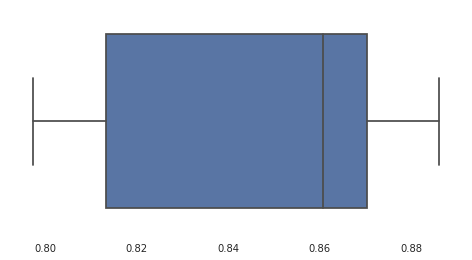

In [72]:
a=cross_val_score(gbm_grid, X_train, y_train, cv=cv_split, scoring="accuracy")
print(a.mean(),a.std())
sns.boxplot(a)

In [73]:
y_predict3 = gbm_grid.predict(X_test)
y_prob3= gbm_grid.predict_proba(X_test)

accuracy = accuracy_score(y_test,y_predict3)
accuracy

0.7986577181208053

In [74]:
y_predict3=np.where(y_prob3[:,1]>0.45,1,0)

In [75]:
print('auc=', roc_auc_score(y_test,y_prob3[:,1]))
print(classification_report(y_test,y_predict3))
confusion_matrix(y_test,y_predict3)

auc= 0.8874747474747475
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        99
           1       0.66      0.78      0.72        50

    accuracy                           0.79       149
   macro avg       0.77      0.79      0.78       149
weighted avg       0.81      0.79      0.80       149



array([[79, 20],
       [11, 39]])

***Model -RandomForestClassifier***

In [76]:
from scipy.stats import randint
pipeline.set_params(clf= RandomForestClassifier())
pipeline.steps

[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False))]

In [77]:
param_grid = {
    'clf__n_estimators' : np.arange(10,80,5),
    'clf__random_state': np.arange(1,50),
    'clf__max_depth': [3,4,5,6,7,8,10],
#     'clf__criterion': ['gini','entropy'],
#     'clf__bootstrap': [True, False],
#     'clf__max_features': np.arange(1,9),
#     'clf__min_samples_leaf': randint(1,4)
}

In [78]:

rf_grid = RandomizedSearchCV(pipeline, param_grid, cv=10, n_iter = 10 )
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'clf__random_state': 35, 'clf__n_estimators': 55, 'clf__max_depth': 8}

In [79]:
rf_grid=rf_grid.best_estimator_

0.8329113924050633 0.02819121196369629


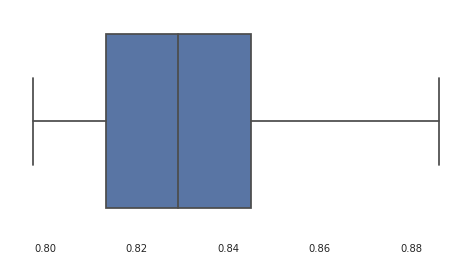

In [80]:
#cross_validation_score for RF
a=cross_val_score(rf_grid, X_train, y_train, cv=cv_split, scoring="accuracy")
print(a.mean(),a.std())
sns.boxplot(a)

In [81]:
y_predict4 = rf_grid.predict(X_test)
y_prob4=rf_grid.predict_proba(X_test)

accuracy = accuracy_score(y_test,y_predict4)
accuracy

0.7919463087248322

In [82]:
print('auc=', roc_auc_score(y_test,y_prob4[:,1]))
print(classification_report(y_test,y_predict4))
confusion_matrix(y_test,y_predict4)

auc= 0.8783838383838384
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        99
           1       0.66      0.78      0.72        50

    accuracy                           0.79       149
   macro avg       0.77      0.79      0.78       149
weighted avg       0.81      0.79      0.80       149



array([[79, 20],
       [11, 39]])

### Plotting ROC curve to reach the conclusion

SVC auc= 0.88989898989899
KNN auc= 0.8672727272727273
GB auc= 0.8874747474747475
RF auc= 0.8783838383838384


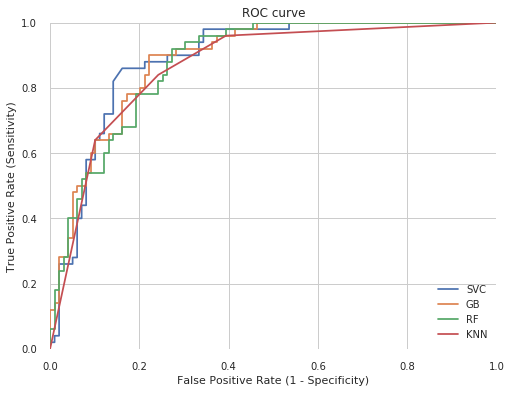

In [83]:
# IMPORTANT: first argument is true values, second argument is predicted
# roc_curve returns 3 objects false positive rate(fpr), true positive rate(tpr), thresholds
from sklearn import metrics

fpr_svc, tpr_svc, thresholds_svc = metrics.roc_curve(y_test, y_prob1[:,1])# y_predict1)
fpr_gbm, tpr_gmn, thresholds_gbm = metrics.roc_curve(y_test, y_prob3[:,1])#y_predict3)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_prob4[:,1])# y_predict4)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test,y_prob2[:,1])#y_predict2)

fig=plt.figure(figsize=(8,6))
plt.plot(fpr_svc, tpr_svc, label="SVC")
plt.plot(fpr_gbm, tpr_gmn, label="GB")
plt.plot(fpr_rf, tpr_rf, label="RF")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

print('SVC auc=', auc(fpr_svc, tpr_svc))
print('KNN auc=', auc(fpr_knn, tpr_knn))
print('GB auc=', auc(fpr_gbm, tpr_gmn))
print('RF auc=', auc(fpr_rf, tpr_rf))


***With ref to ROC curve and AUC value [We are choosing SVC as final model]() and We can further improve SVC using bagging classifier.***

In [84]:
#Scaling the data as it is while traing through pipeline
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train, X_test=scale.fit_transform(X_train) ,scale.fit_transform(X_test)



In [85]:
from sklearn.ensemble import BaggingClassifier
# model = KNeighborsClassifier(n_neighbors=3, metric='minkowski',algorithm='ball_tree')


model = SVC(kernel='rbf',
         gamma= 'scale',
         C=3.7816326530612248,
         probability=True,
         random_state= 118)
svc = BaggingClassifier(n_estimators=150, base_estimator=model, random_state=70)
svc.fit(X_train,y_train)


BaggingClassifier(base_estimator=SVC(C=3.7816326530612248, break_ties=False,
                                     cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='scale', kernel='rbf',
                                     max_iter=-1, probability=True,
                                     random_state=118, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=150, n_jobs=None,
                  oob_score=False, random_state=70, verbose=0,
                  warm_start=False)

In [86]:
svc.score(X_test,y_test)

0.8187919463087249

In [87]:
y_prob5=svc.predict_proba(X_test)

In [88]:
y_predict5=np.where(y_prob5[:,1]>0.48,1,0)

In [89]:
# y_predict5 = svc.predict(X_test)
print('auc=', roc_auc_score(y_test,y_prob5[:,1]))
print(classification_report(y_test,y_predict5))
confusion_matrix(y_test,y_predict5)


auc= 0.8848484848484849
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        99
           1       0.67      0.88      0.76        50

    accuracy                           0.81       149
   macro avg       0.80      0.83      0.80       149
weighted avg       0.84      0.81      0.82       149



array([[77, 22],
       [ 6, 44]])

**[Not Improved performance is obtained with bagging](), so we will use SVC model without bagging just to avoid complexity..**

In [91]:
model = SVC(kernel='rbf',
         gamma= 'scale',
         C=2.7816326530612248,
         probability=True,
         random_state= 118)

svc=model.fit(X_train,y_train)
svc.score(X_test,y_test)
y_predict5 = np.where(svc.predict_proba(X_test)[:,1]>0.488,1,0)#svc.predict(X_test)
print(classification_report(y_test,y_predict5))
c_mat=confusion_matrix(y_test,y_predict5)
c_mat

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        99
           1       0.69      0.90      0.78        50

    accuracy                           0.83       149
   macro avg       0.82      0.85      0.82       149
weighted avg       0.86      0.83      0.84       149



array([[79, 20],
       [ 5, 45]])

## Conclusions:
After tuning the models with respect to hyper-parameters as well, still we are getting the test accuracy of around 84, 78, and 79% resply with Test Dataset. **[Since, our dataset is small, the ensemble model will likely have more variance]().**

***So, We are choosing Support Vector Classifier(SVC) because:*** 
  1. It is providing higher TPR(Sensitivity) or Recall with reference of above ROC curve graph. 
  2. Test Accuracy and Cross validation accuracy with Tuned hyperparameter tuning is higher and almost same with SVC.
  3. Overall good performance of SVC on F1_Score.
  4. lesser buildup time compare to RF.
  5. lesser STD deviation of 0.0189 with CV acc score. it means maximum times accuracy will lie in this range with same dataset and same model.

**Confidence interval Stats**

As our Sample size is more than 30 we are assuming data as Normal distribution with reference of Central limit theorem

In [92]:
FP=c_mat[0,1]
FN=c_mat[1,0]
TP=c_mat[1,1]
TN=c_mat[0,0]
error=(FP+FN)/(TP+TN+FP+FN)
# 95% confidence interval for error we get with this model
lc=(error - 1.96*np.sqrt(error*(1-error)/X_test.shape[0]))
uc=(error +1.96*np.sqrt(error*(1-error)/X_test.shape[0]))
print(lc, uc)

0.10778436931383173 0.227786100484826


In [93]:
# 95% confidence interval for accuracy will be
Higher_limit_acc=100-lc*100
Lower_lmit_acc=100-uc*100
print('Accuracy with SVC model with 955 Confidence interval will lie between {} % to {} %'.format(round(Lower_lmit_acc),round(Higher_limit_acc)))

Accuracy with SVC model with 955 Confidence interval will lie between 77.0 % to 89.0 %


# Interpreting Models


In [94]:
#Output Data:
y_pred=pd.DataFrame(y_predict5, columns=['Predictions'])
y_test1=pd.DataFrame(y_test.values, columns=['Test_Data'])
output=pd.concat((y_test1,y_pred),axis=1)

In [95]:
output[(output['Test_Data']==1)].head()

,Test_Data,Predictions
6,1,1
17,1,1
21,1,1
26,1,1
27,1,0


In [96]:
names=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age',
       'AG_Prob_D', 'IG_Prob_D', 'Preg_DPF']
features.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age',
       'AG_Prob_D', 'IG_Prob_D', 'Preg_DPF'],
      dtype='object')

In [97]:
# Load ML Interpreting Models
import shap
# Initialize JS For Plot
shap.initjs()

In [98]:
explainer = shap.KernelExplainer(svc.predict_proba, data=X_train)

Using 788 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [99]:
shap_values = explainer.shap_values(X_test, nsamples=100)

In [100]:
shap.force_plot(explainer.expected_value[1], shap_values[1][17,:], X_test[17,:],feature_names=names) #miss classified data row

1. The output value is the prediction probability for that observation of respected output.( above showing 17th row/index row of X_test data for expected value of 1 (means our positive outcome) on y_test data. Expected value we write as 1 and thus used shap values also 1 because shap value matrix calculated seperately for separate outcomes, thus we specify ehich outcome is of our intrest.)
1. Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.(note: on above force plot predicted outcome is 1. output value shows the probablity of output for predicting 1 it is  0.92 and it is above base value, thus predicted as 1)
2. Glucose: Pushes the prediction to the right with higher intensity.

### The collective force plot:

  Each observation has its own force plot. If all the force plots are combined, rotated 90 degrees and stacked       horizontally, we get the force plot of the entire data X_test.

In [101]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test, feature_names=names, figsize=(25, 14))

#### Note:
+ Red :: Feature values that push the prediction higher
+ Blue :: Feature values that pull the prediction lower      
+ You can check for individual features and compare each feature with the other

In [102]:
features.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,AG_Prob_D,IG_Prob_D,Preg_DPF
0,84.0,58.655647,23.413174,63.830150,30.276492,21.0,0,0,0.608
1,102.0,52.000000,17.144229,107.217628,25.100000,21.0,0,0,0.000
2,114.0,66.000000,36.000000,200.000000,38.100000,21.0,0,1,0.289
3,108.0,62.000000,32.000000,56.000000,25.200000,21.0,0,0,0.256
4,134.0,58.000000,20.000000,291.000000,26.400000,21.0,0,1,0.000


### Summary of All Effect of All Features
+ Using shap.summary_plot()

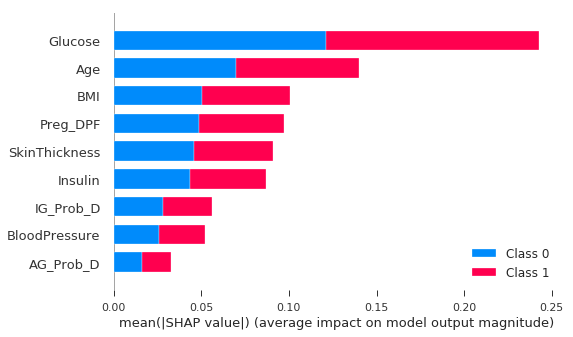

In [103]:
shap.summary_plot(shap_values,X_test, feature_names=names)

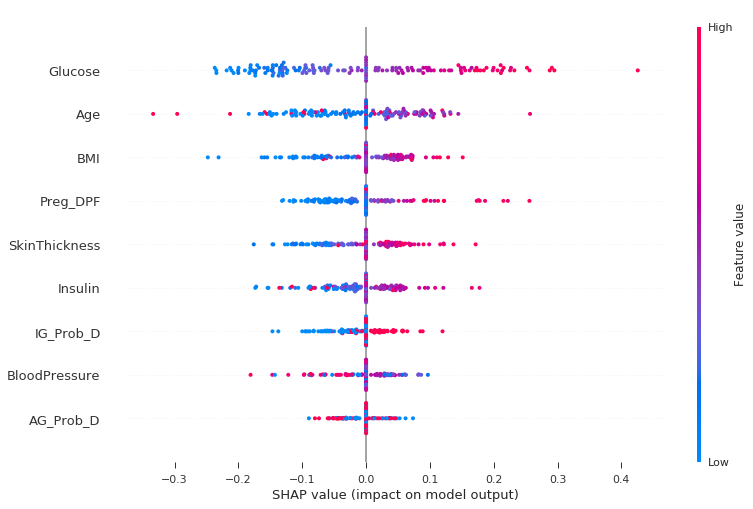

In [104]:
shap.summary_plot(shap_values[1] ,X_test, feature_names=names, plot_size=(12,8))

### Insights:
1. How each feachure is important and how it is affecting our outcome the above graphs explains
2. large spread horizantally indicate large importance and impact of that feature on outcome positvely if spread of datapoints is on right side, negatively if it is on left side
3. colour blue and red indicating feature value . Red means higher value and Blue means lower value indicating a range from low to high with changing colour from blue to red resply.
4. From above graph we came to know Higher values of Glucose more impact on prediction in positively and lower values has negative impact

### Dependency Plot
+ Shows the effect of a single feature has on the prediction
+ How much the prediction depends on a particular feature

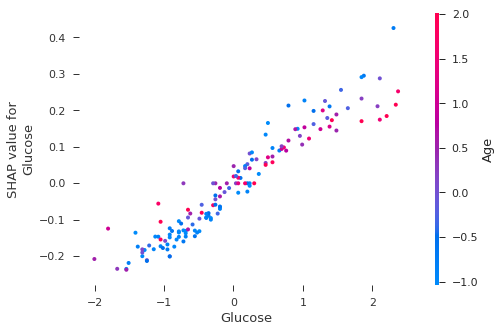

In [105]:
shap.dependence_plot(0,shap_values[1], X_test, feature_names=names)

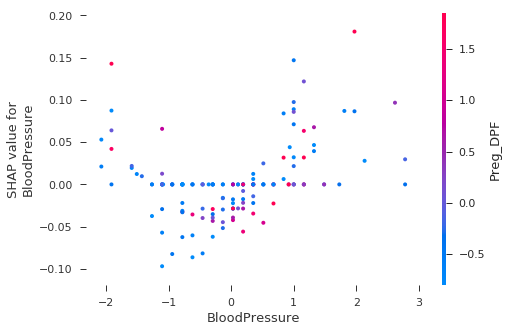

In [106]:
# Glucose Concentration
shap.dependence_plot(1,shap_values[0], X_test, feature_names=names)

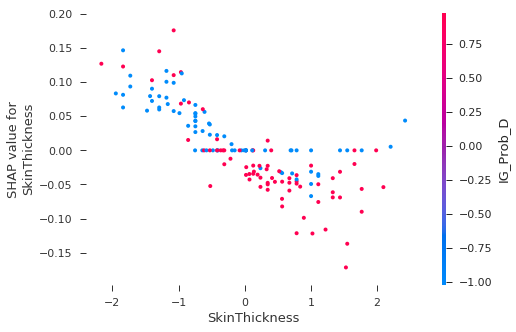

In [107]:
# Glucose Concentration
shap.dependence_plot(2,shap_values[0], X_test, feature_names=names)

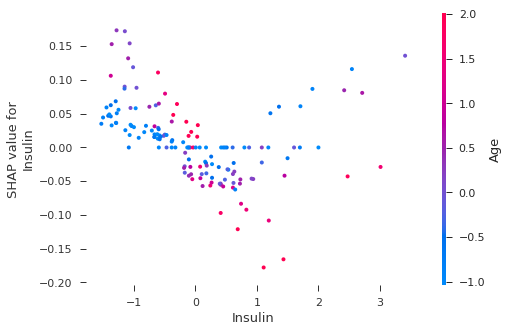

In [108]:
shap.dependence_plot(3,shap_values[0], X_test, feature_names=names)

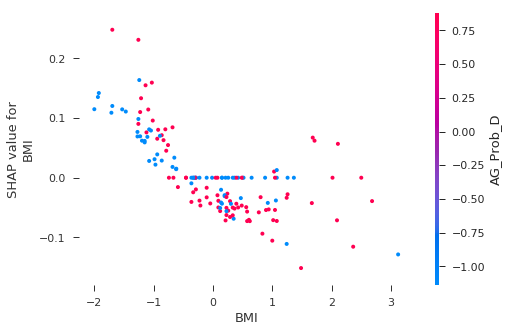

In [109]:
shap.dependence_plot(4,shap_values[0], X_test, feature_names=names)

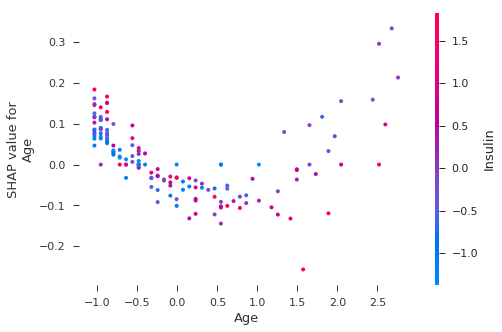

In [110]:
shap.dependence_plot(5,shap_values[0], X_test, feature_names=names)

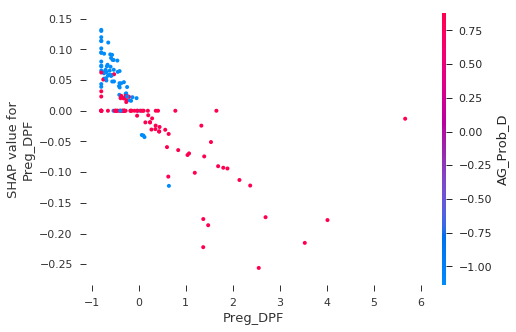

In [111]:
shap.dependence_plot(8,shap_values[0], X_test, feature_names=names)

In [112]:
# Deploy the model
import pickle
pickle.dump(svc,open('Diabetespredictor.model','wb'))